# Wave equation in one dimension

The following will demonstrate integration of a differential equation for a wave equation in one dimension on a unstructured grid.  The basic form of the wave equation is,

\begin{equation}
f(x) = A\cos(kx - \omega t),
\end{equation}
where $k$ is the wave vector, $\omega$ is the angular frequency and $A$ is the amplitude of the wave.

The wave obeys the following differential equation,

\begin{align}
\partial_tf(x) &= \omega A\sin(kx - \omega t)\nonumber\\
&= -v\partial_xf(x),
\end{align}
where $v = \frac{\omega}{k}$ is the wave velocity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# we'll need Matrix, UGrid, and Approximator
from etraj.etraj import Vector, Matrix, UGrid, Approximator, ScalarField, WaveEQ1D

import etraj.etraj as et

In [26]:
# we can use numpy to generate a uniform sample over [-pi,pi]
N = 100
x = np.random.uniform(-np.pi,np.pi,N)

# and then create the unstructured grid
g = UGrid(x)

In [27]:
# setting A = k = w = 1,
A = 1
k = 1
w = 1
# the field values at t = 0 are
p = A*np.cos(k*x)

In [28]:
# finally we have for the field,
W = WaveEQ1D(g,A,k,w)
W.set_field(p)
W.get_approximator().set_k(10)
W.get_approximator().set_n(5)
W.set_approx_type('LS')
print(W.get_approximator())


Approximator type: Vanilla least squares
Least squares driver type: xGELS
Approximator parameters - k = 10
                          n = 5


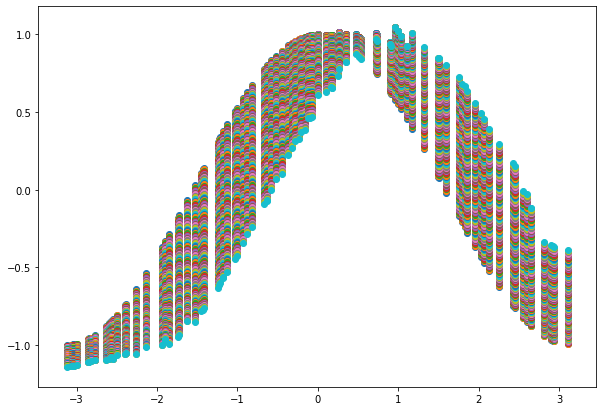

In [29]:
# first import the integrator
from etraj.etraj import Integrator
fig,axs = plt.subplots(figsize=(10,7))
t = 0
field = np.asarray(W.get_field())
true = np.cos(x + t)
error = [np.sum(np.abs(field-true))]
for i in range(100):
    t += 0.01
    W.get_integrator().scalar_RK4_step(g,W,0.01)
    field = np.asarray(W.get_field())
    true = np.cos(x - t)
    error.append(np.sum(np.abs(field-true)))
    axs.scatter(x,W.get_field())


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '50.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmp11gx6la0/temp.m4v']' returned non-zero exit status 255.

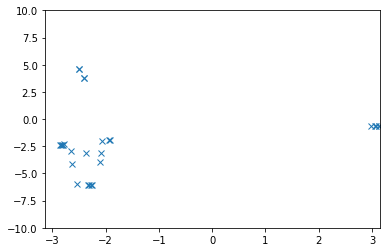

In [40]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
line, = ax.plot([], [], linestyle="",marker='x')


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(-10, 10)
    return line,



# animation function. This is called sequentially
def animate(i):
    G.get_integrator().scalar_RK4_step(g,G,0.01)
    y = G.get_field()
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)

HTML(anim.to_html5_video())
# # Set up formatting for the movie files
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
# anim.save('gauss.mp4', writer=writer)
# plt.show